# The Data

### The data we will use is monthly sunspot data from 1749-2019 recording the number of sunspots per month. The file sunspot.csv and can be downloaded from the kaggel.


# Import Packages

#### In addition to Statsmodels, we will need to import additional packages, including Numpy, Scipy, Pandas and Matplotlib.

#### Also, from Statsmodels we will need to import qqplot.

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

In [2]:
df = pd.read_csv("Sunspots.csv")
df.head(10)

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
5,5,1749-06-30,139.2
6,6,1749-07-31,158.0
7,7,1749-08-31,110.5
8,8,1749-09-30,126.5
9,9,1749-10-31,125.8


In [5]:
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3247,3247,31-08-2019,0.5
3248,3248,30-09-2019,1.1
3249,3249,31-10-2019,0.4
3250,3250,30-11-2019,0.5


# Preparing the data
### Next we need to do a little dataset preparation. Here, an monthly date series must be date-time at the end of the year

In [9]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 1749-01-31 to 31-12-2019
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1)
memory usage: 50.8+ KB


In [15]:
df = pd.read_csv("Sunspots.csv", index_col=[1], parse_dates=[0])

In [18]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [19]:
df

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
31-08-2019,0.5
30-09-2019,1.1
31-10-2019,0.4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3252 entries, 1749-01-31 to 31-12-2019
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1)
memory usage: 50.8+ KB


# Examine The Data

#### Now we take a look at the data

<AxesSubplot:xlabel='Date'>

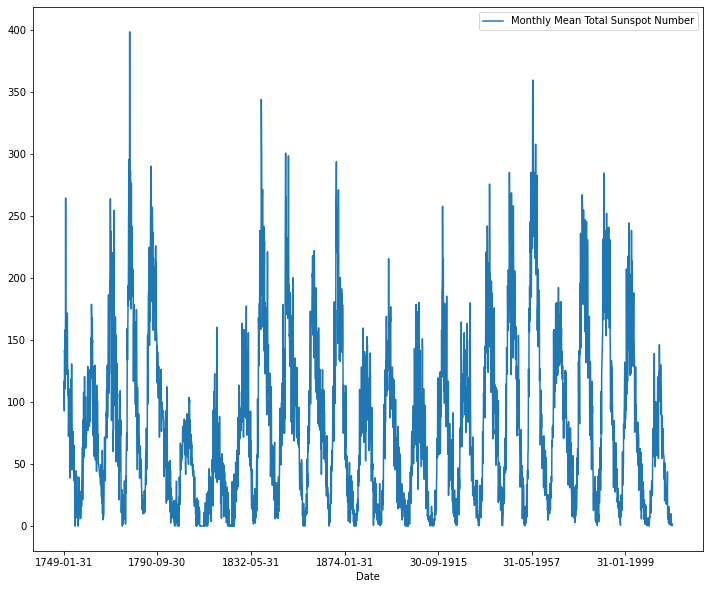

In [24]:
# Show plots in the notebook
#%matplot inline
df.plot(figsize = (12,10))

In [25]:
sm.stats.durbin_watson(df)

array([0.06666113])

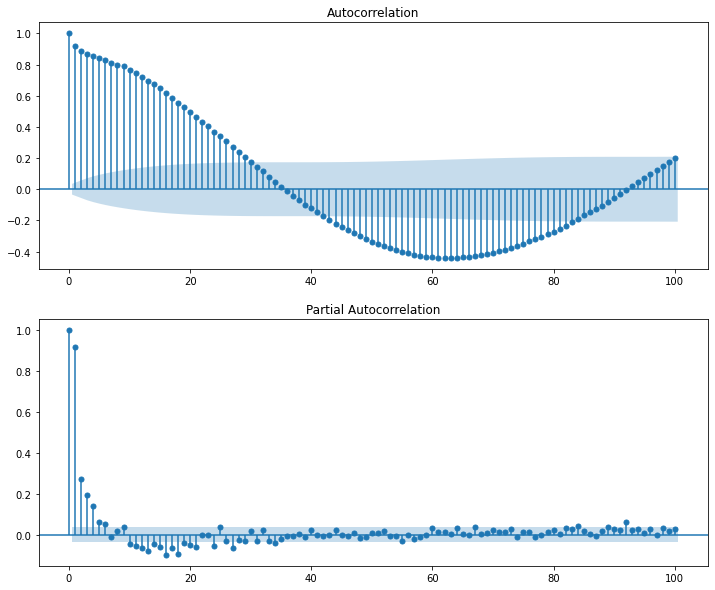

In [29]:
# show plots in the notebook
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags = 100, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags = 100, ax = ax2)

In [30]:
df.head(2)

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3


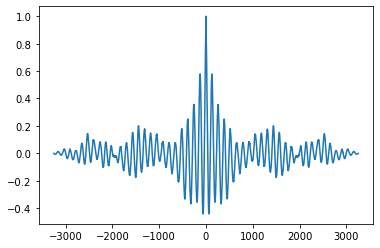

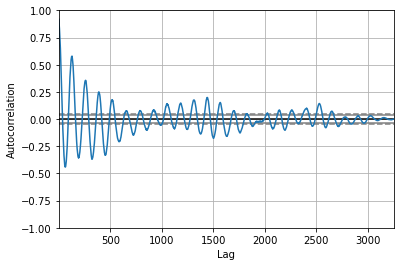

In [31]:
from pandas.plotting import autocorrelation_plot
# Show plots in the notebook
df['SUNACTIVITY_2'] = df['Monthly Mean Total Sunspot Number']
df['SUNACTIVITY_2'] = (df['SUNACTIVITY_2'] - df['SUNACTIVITY_2'].mean())/(df['SUNACTIVITY_2'].std())
plt.acorr(df['SUNACTIVITY_2'], maxlags = len(df['SUNACTIVITY_2']) - 1, linestyle = "solid", usevlines = False, marker = '')
plt.show()
autocorrelation_plot(df['Monthly Mean Total Sunspot Number'])
plt.show()

In [32]:
arma_mod20 = sm.tsa.ARMA(df['Monthly Mean Total Sunspot Number'],(1,0)).fit()
print(arma_mod20.params)

C:\Users\DB0186AU\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\DB0186AU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency

const                                      81.844476
ar.L1.Monthly Mean Total Sunspot Number     0.917814
dtype: float64


#### We now calculate the Akaike information Criterion(AIC), Schwarz Bayesian Information Criterion(BIC), and Hannan-Quinn Information Criterion(HQIC). Our goails to choose a model that minimize(AIC,BIC,HQIC)

In [33]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

30655.0870475529 30673.348123964905 30661.628613455043


In [34]:
sm.stats.durbin_watson(arma_mod20.resid.values)

2.500794950560213

#### The Durbin-Watson test shows no autocorrelation

# Plotting the data

#### Next we plot and study the data it represents.

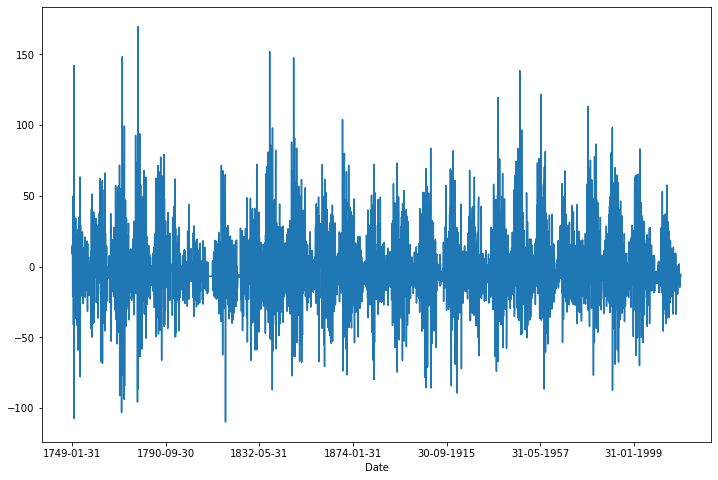

In [35]:
# Show plots in the notebook
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax = ax);

# Analyzing the Residuals

##### In the following steps, we calculate the residuals, tests the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot.

In [36]:
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=417.1436690159189, pvalue=2.6206148203483023e-91)

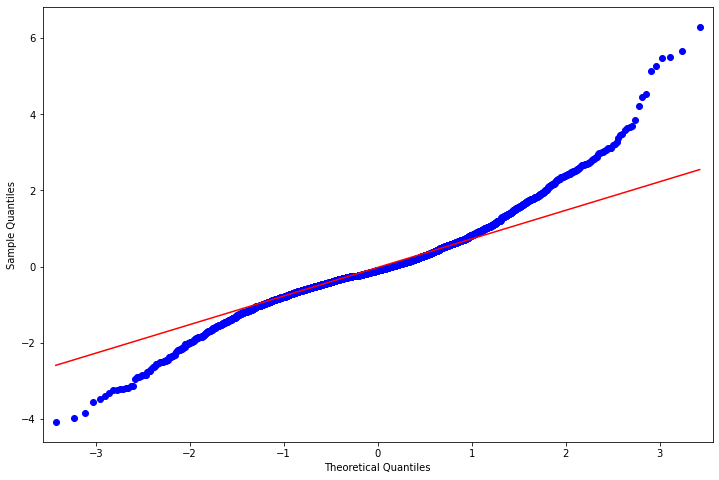

In [37]:
# Show plot in the notebook
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line = 'q', ax = ax, fit = True)

# Model Autocorrelation 

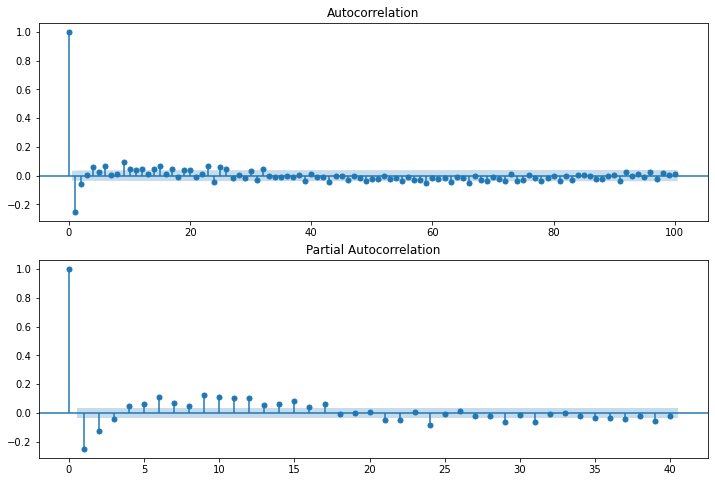

In [38]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags = 100, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags = 40, ax = ax2)

#### Next, we calculate the lag, autocorrelation(AC), Q statistic and Prob>Q. The Ljung-Box Q test (named for Greta M.Ljung and George E.P.Box) is a type of statistical test of whether any of a group of autocorrelation of a time series are different from zero. The null hypothesis is H0: The data are independently distributed.

In [39]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat = True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns = ['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0  -0.250451  204.172106  2.567028e-46
2.0  -0.056666  214.627094  2.479241e-47
3.0   0.005087  214.711366  2.791873e-46
4.0   0.060693  226.712629  6.733459e-48
5.0   0.025365  228.809471  1.924714e-47
6.0   0.069905  244.740137  5.454722e-50
7.0   0.005024  244.822443  3.502241e-49
8.0   0.011746  245.272481  1.730332e-48
9.0   0.094759  274.572036  6.377048e-54
10.0  0.046100  281.508795  1.250857e-54
11.0  0.039906  286.708458  5.505434e-55
12.0  0.043430  292.868739  1.473589e-55
13.0  0.013234  293.440904  5.663325e-55
14.0  0.044697  299.969859  1.199313e-55
15.0  0.068315  315.226519  3.800313e-58
16.0  0.010570  315.591888  1.492475e-57
17.0  0.046671  322.717057  2.262879e-58
18.0 -0.006500  322.855292  9.399301e-58
19.0  0.037965  327.572937  4.326972e-58
20.0  0.036696  331.981993  2.270268e-58
21.0 -0.010143  332.318972  8.015063e-58
22.0  0.011060  332.719694  2.681060e-57
23.0  0.068276  

C:\Users\DB0186AU\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\DB0186AU\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


# Predictions

#### Next, we compute the predictions and analyze their fit against actual values.

In [40]:
predict_sunspots20 = arma_mod20.predict('2012', '2019', dynamic = True)
print(predict_sunspots20)

2012-01-31    107.043543
2012-02-29    104.972534
2012-03-31    103.071733
2012-04-30    101.327152
2012-05-31     99.725950
                 ...    
2019-08-31     81.854757
2019-09-30     81.853912
2019-10-31     81.853137
2019-11-30     81.852425
2019-12-31     81.851772
Freq: M, Length: 96, dtype: float64


In [48]:
df.tail(100)

,Monthly Mean Total Sunspot Number,SUNACTIVITY_2
Date,,
30-09-2011,120.1,0.560369
31-10-2011,125.7,0.642886
30-11-2011,139.1,0.840338
31-12-2011,109.3,0.401229
31-01-2012,94.4,0.181675
...,...,...
31-08-2019,0.5,-1.201960
30-09-2019,1.1,-1.193119
31-10-2019,0.4,-1.203433


In [49]:
df.loc['31-01-2012':]

,Monthly Mean Total Sunspot Number,SUNACTIVITY_2
Date,,
31-01-2012,94.4,0.181675
29-02-2012,47.8,-0.504985
31-03-2012,86.6,0.066740
30-04-2012,85.9,0.056426
31-05-2012,96.5,0.212619
...,...,...
31-08-2019,0.5,-1.201960
30-09-2019,1.1,-1.193119
31-10-2019,0.4,-1.203433


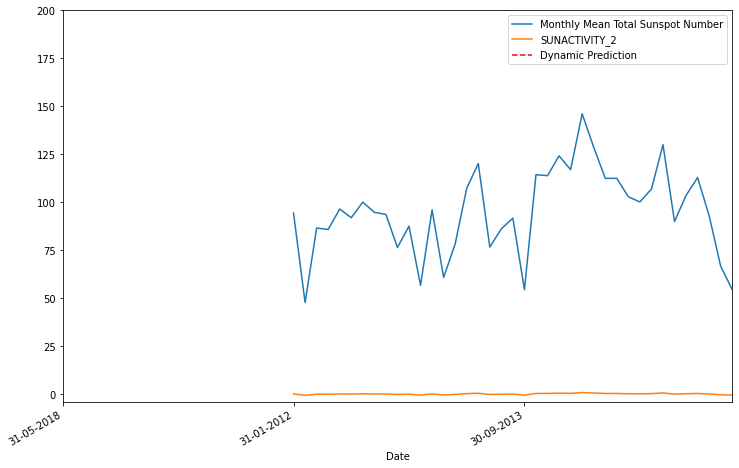

In [50]:
ax = df.loc['31-01-2012':].plot(figsize = (12,8))
ax = predict_sunspots20.plot(ax = ax, style = 'r--', label = 'Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));